<a href="https://colab.research.google.com/github/kocurvik/BCS_results/blob/master/HUPV/notebooks/cv02_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Lab - kNN classifier, validation
In today's lab, we will implement a simple kNN classifier on 2D data. We will then test the classifier on images and extend it to a classifier for several classes. We will implement everything in numpy.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Synthetic data

For the purposes of this lab, we will first work with synthetic data. We will generate them by assuming that the 2D data are from two normal distributions, while each of the two distributions corresponds to one class.

We will generate both training data and test data.

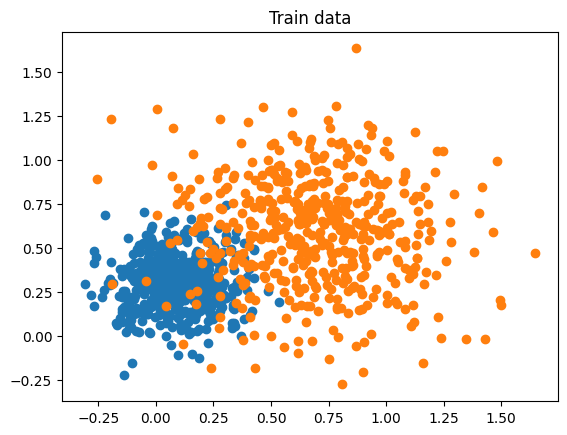

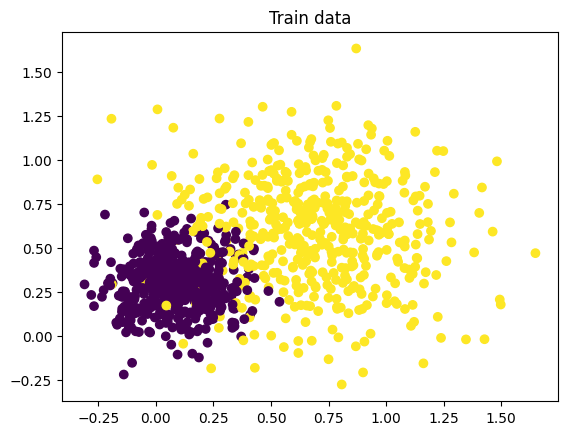

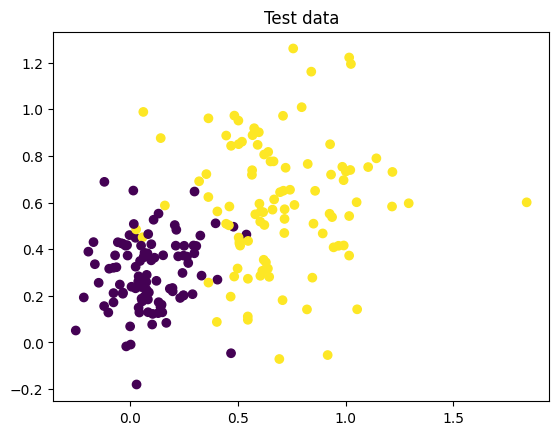

In [ ]:
np.random.seed(15)

x1_center = np.array([0.1, 0.3])
x1 =  x1_center + 0.15 * np.random.randn(500, 2)

x2_center = np.array([0.7, 0.6])
x2 =  x2_center + 0.3 * np.random.randn(500, 2)

# while the classes are separated they are easy to plot
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.title("Train data")
plt.show()

# we will modify the data to have vector x with data and y with labels
y = np.ones(1000)
y[500:] = 2
x = np.concatenate([x1, x2], axis=0)

# dáta si ešte premiešame
pindxs = np.random.permutation(1000)
x = x[pindxs]
y = y[pindxs]

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Train data")
plt.show()

# we will also generate the test data
x1_test = x1_center + 0.15 * np.random.randn(100, 2)
x2_test =  x2_center + 0.3 * np.random.randn(100, 2)
y_test = np.ones(200)
y_test[100:] = 2
x_test = np.concatenate([x1_test, x2_test], axis=0)
pindxs = np.random.permutation(200)
x_test = x_test[pindxs]
y_test = y_test[pindxs]

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test data")
plt.show()

## Numpy operations

Various operations can also be performed on numpy fields. For example, it is possible to sum an array using the np.sum command. The commands np.min (mininum), np.max (maximum), np.mean (average), np.median (median), np.var (variation) and np.std (standard deviation) work similarly.



In [ ]:
a = np.random.rand(4, 3)
print(a)
print(np.mean(a))
print(np.median(a))
print(np.sum(a))
print(np.std(a))

[[0.10468717 0.0505089  0.60078189]
 [0.22579485 0.95804891 0.69156222]
 [0.35193104 0.3526966  0.08137849]
 [0.89287808 0.78544143 0.12926174]]
0.43541427740251143
0.3523138220078428
5.224971328830137
0.32044923735412534


### Keyword axis

We often want an operation to be performed only along a single dimension - e.g. summing each row of the file. In that case, it is appropriate to use the axis keyword. This will allow us to sum along a specific dimension. It is also possible to specify multiple dimensions along which to perform the operation. Many numpy commands have this keyword available.

In [ ]:
print(a)
print(np.sum(a, axis=0))
print(np.sum(a, axis=0).shape)
print(np.sum(a, axis=1))
print(np.sum(a, axis=1).shape)

b = np.random.rand(4,3,16,16)
print(np.sum(b, axis=(1,2,3)))
print(np.sum(b, axis=(1,2,3)).shape)

[[0.10468717 0.0505089  0.60078189]
 [0.22579485 0.95804891 0.69156222]
 [0.35193104 0.3526966  0.08137849]
 [0.89287808 0.78544143 0.12926174]]
[1.57529115 2.14669584 1.50298434]
(3,)
[0.75597797 1.87540598 0.78600613 1.80758125]
(4,)
[372.17791061 380.53947063 372.8542892  381.42551829]
(4,)


### Exercise 1 - Euclidean metric

Implement the function euclidian_distance_single(x, y), which takes two vectors x and y as input, both from $\mathbb{R}^n$, and calculates:

$$\rho_e(\vec{x}, \vec{y}) = \sqrt{\sum_{i=1}^{n} \left(x_i - y_i\right)^2}$$

In [ ]:
def euclidian_distance_single(x, y):
  ...

You can test your implementation by comparing the output to the output of `np.linalg.norm` which does the same.

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(n)

  d = euclidian_distance_single(a, b)
  d_gt = np.linalg.norm(a - b)
  if np.abs(d_gt - d) < 1e-8:
    print("Pass!")
  else:
    print("Fail")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


### Exercise 2 - Euclidean vectorized

Now we will create a new euclidian distance function that will work by letting x be a vector $\mathbb{R}^n$ and y be an $m \times n$ matrix, each row of which is a vector from $\mathbb{R}^n$ . The function then returns a vector of length $m$, which will contain the metrics between x and the individual vectors of y.

In [ ]:
def euclidian_distance(x, y):
  ...

We can test the code.

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(30, n)

  d = euclidian_distance(a, b)

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i]) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


### 2. Exercise (bonus) - other metrics

Try to implement the function distance(x, y, metric='metric_name'), which can handle other metrics, e.g. Manhattan metric:

$$\rho_m(\vec{x}, \vec{y}) = \sum_{i=1}^n \left|x_i - y_i \right|,$$

maximum metric

$$\rho_{max}(\vec{x}, \vec{y}) = \text{max}_{i \in \hat{n}}(\left|x_i - y_i \right|),$ $

or the general p metric (add one more keyword p to the function):

$$\rho_p(\vec{x}, \vec{y}) = \left(\sum_{i=1}^{n} \left|x_i - y_i\right|^p\right)^{\frac {1}{p}}$$

In [ ]:
def distance(x, y, metric='euclidian', p=2):
  ...

We can test the code

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(30, n)

  d = distance(a, b, metric='euclidian')

  print("Testing Euclidian metric!")

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i]) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

  print("Testing  max metric!")
  d = distance(a, b, metric='max')

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=np.inf) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")


  print("Testing  manhattan metric!")
  d = distance(a, b, metric='manhattan')

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=1) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

  print("Testing  p metric (p=4)!")
  d = distance(a, b, metric='p', p=4)

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=4) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")


  print("Testing  p metric (p=3.5)!")
  d = distance(a, b, metric='p', p=3.5)

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i], ord=3.5) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidian metric!
Pass!
Pass!
Pass!
Pass!
Testing  max metric!
Pass!
Pass!
Pass!
Pass!
Testing  manhattan metric!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=4)!
Pass!
Pass!
Pass!
Pass!
Testing  p metric (p=3.5)!
Pass!
Pass!
Pass!
Pass!
Testing Euclidia

### argmax, argmin etc.

Sometimes we only want to find out the maximum or minimum index. In that case, we will mostly use the version of the command with the arg prefix. The problem arises if we have a multidimensional field. Then either we have to use the keyword axis, or the command returns the order but after using the ravel function. See the code:

In [ ]:
a = np.random.rand(5)
print(a)
max_idx = np.argmax(a)
print(max_idx)
print(a[max_idx])

b = np.random.rand(4, 3)
print(b)
max_idx = np.argmax(b)
print(max_idx)
print(np.ravel(b)[max_idx])

print("Row-wise")
max_idx = np.argmax(b, axis=0)
print(max_idx)

print("Column-wise")
max_idx = np.argmax(b, axis=-1)
print(max_idx)

[0.1719465  0.74021196 0.01277337 0.14652353 0.78008536]
4
0.7800853581693558
[[0.22849069 0.80270186 0.61931866]
 [0.44722593 0.39674261 0.44813566]
 [0.07005837 0.50587193 0.586012  ]
 [0.47776711 0.32939562 0.35390362]]
1
0.8027018552980018
Row-wise
[3 0 0]
Column-wise
[1 2 2 0]


### Sort

Today we will make a kNN classifier, so we will need a function to sort fields. It works simply using sort, it also has an argsort variant.

In [ ]:
a = np.random.rand(10)
print(a)
print(np.sort(a))
sort_idx = np.argsort(a)
print(sort_idx)
print(a[sort_idx])

[0.17104017 0.56895423 0.08364313 0.92422729 0.27251358 0.52587902
 0.91738357 0.67916669 0.41443978 0.59053941]
[0.08364313 0.17104017 0.27251358 0.41443978 0.52587902 0.56895423
 0.59053941 0.67916669 0.91738357 0.92422729]
[2 0 4 8 5 1 9 7 6 3]
[0.08364313 0.17104017 0.27251358 0.41443978 0.52587902 0.56895423
 0.59053941 0.67916669 0.91738357 0.92422729]


### Exercise 3 - Argpartition

Sort generally has complexity $O(n \text{log}(n))$ for field length $n$. That's why we need the `np.argpartition` function. Find it in the documentation, use it to get the first indices of the smallest elements using the k_min(x) function.

In [ ]:
def k_min(x, k):
  ...

We can test the function:

In [ ]:
for i in range(10):
  n = 10 + np.random.randint(20)
  k = np.random.randint(n)

  a = np.random.rand(n)

  min_idxs = set(k_min(a, k).tolist())
  if min_idxs == set(np.argsort(a)[:k]):
    print("Pass!")
  else:
    print("Fail!")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


## Exercise 4 - kNN classifier - 2D data

First, you will have the task of implementing the kNN classifier. How it works should be obvious from the name (k nearest neighbors). But we will write it more formally.

Formal classification consists if finding a function that assigns one of the $C$ classes to a vector from $\mathbb{R}^n$ and thus the classifier is $f : \mathbb{R}^n \mapsto \{1, 2,~.. .~,C\}$.

In the case of the kNN classifier, we also have training data consisting of $m$ pairs from $\mathbb{R}^n \times \{1, 2,~...~,C\}$ i.e. $\{(\vec{x}_1, y_1), (\vec{x}_2, y_2),~...~,(\vec{x}_m, y_m)\}$, where for each vector $\vec{x}_i$ we have a correctly labeled class $y_i$.

The function $f$ then, for the input $\vec{x}$, returns the class that is most represented in the $k$-membered set $N$, which contains $k$ vectors $\vec{x}_i$ from the training data for which $\ rho(\vec{x}, \vec{x}_i)$ smallest for some metric $\rho$. In other words, we classify $\vec{x}$ according to which class prevails among its $k$ neighbors from the training data with respect to some metric $\rho$.

Implement the function knn(x, k, x_train, y_train), at the input it will have as x the vector from $\mathbb{R}^n$ that we want to classify, as k the parameter of the number of neighbors $k$ as x_train the matrix $\mathbb{ R}^{m \times n}$, whose rows will be vectors from the training set and as y_train a vector with class values for vectors from the training set. For now, implement the function so that it uses the Euclidean metric.

Try to avoid for loops and use broadcasting. In addition to standard numpy methods like `np.sum`, `np.sqrt`, etc. `np.argpartition` and `np.unique` will also come in handy.

Whoever gets it done sooner can modify the script so that with the additional parameter `metric='metric_name'` which determines the metric to use.

In [ ]:
def knn(x, k, x_train, y_train):
  ...


Kód si otestujeme:

Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0


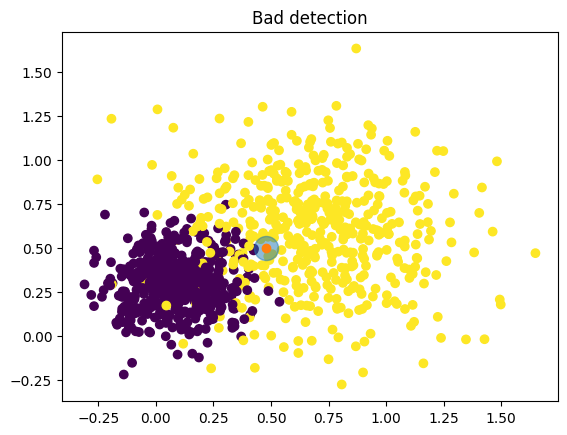

Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 1.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 1.0 - GT class: 1.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0
Predicted class: 2.0 - GT class: 2.0


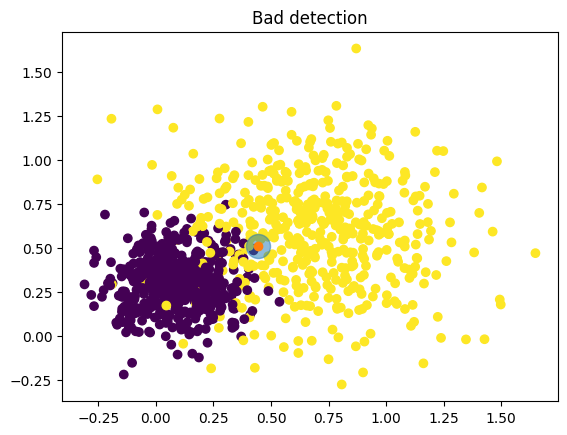

In [ ]:
for i in range(10):
  y_pred = knn(x_test[i], 3, x, y)
  print("Predicted class: {} - GT class: {}".format(y_pred, y_test[i]))

# This should not work in the 4th (index 3) element of the test set. We can display it.

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x_test[3, 0], x_test[3, 1], 300, marker='o', alpha=0.5)
plt.scatter(x_test[3, 0], x_test[3, 1], marker='o')
plt.title("Bad detection")
plt.show()


for i in range(10):
  y_pred = knn(x_test[i], 19, x, y)
  print("Predicted class: {} - GT class: {}".format(y_pred, y_test[i]))

# It doesn't work for the 9th element of the test set for k=3, but works with k=19

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x_test[8, 0], x_test[8, 1], 300, marker='o', alpha=0.5)
plt.scatter(x_test[8, 0], x_test[8, 1], marker='o')
plt.title("Bad detection")
plt.show()



## Exercise 5 - Validation

We can notice that the result of the classifier on our test data will depend on the choice of the parameter $k$, or metrics. Therefore, it would be nice to find a procedure to determine $k$. Seemingly, we could choose the $k$ that is the best on the test data. However, this is not suitable from a scientific point of view, as we would like to use the test data purely to verify accuracy. If we were to choose $k$ on them, the so-called overlearning, which would distort our results. Therefore, we will determine the parameter $k$ using the so-called validation set, which we will separate from the training set and use it exclusively to verify the accuracy for individual $k$ values. Thus its elements will no longer appear as inputs to the knn function.

So, as an exercise, write a code that will allocate a validation set (about 20 percent of the training set) and find the most suitable $k$ parameter on it. Finally, print the resulting accuracy for the selected $k$ on the training set.

Whoever gets it done sooner can also implement the so-called cross-validation as described on [wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).


In [ ]:
...

[0.905, 0.9316666666666666, 0.9383333333333334, 0.9366666666666666, 0.9283333333333333, 0.9333333333333333, 0.935, 0.9383333333333334, 0.9383333333333334, 0.94]


##  MNIST

We will now load the well-known MNIST dataset and test the kNN classifier on it. This dataset contains images of numbers and, of course, annotations for them.

As an exercise, divide the data into 50,000 training, 10,000 validation and 10,000 test items and try to find the most suitable k and evaluate the accuracy of such a classifier on the test data.

*Note:* It may take some time to load the dataset. If you don't want to, you can skip it and do the last exercise and then return to this one.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = np.array(mnist.data, dtype=float) / 255
y = np.array(mnist.target, dtype=int)

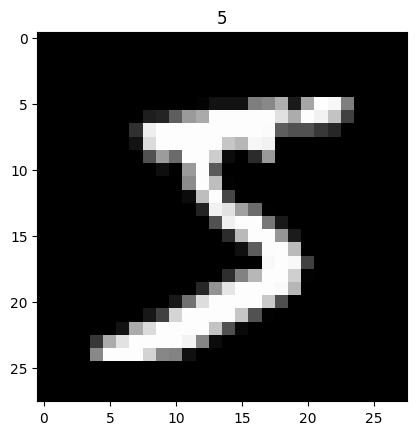

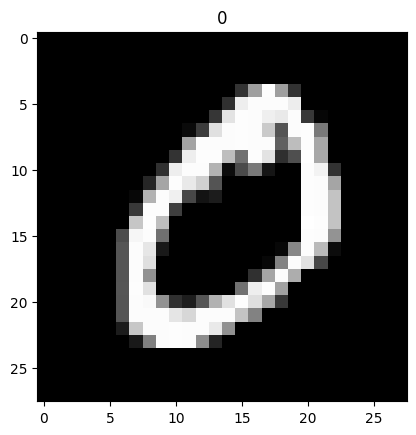

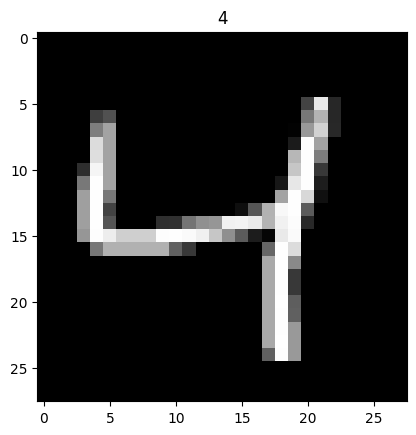

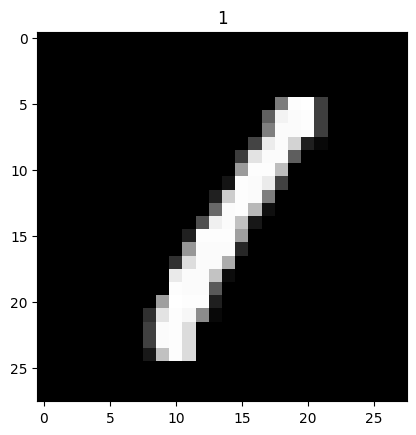

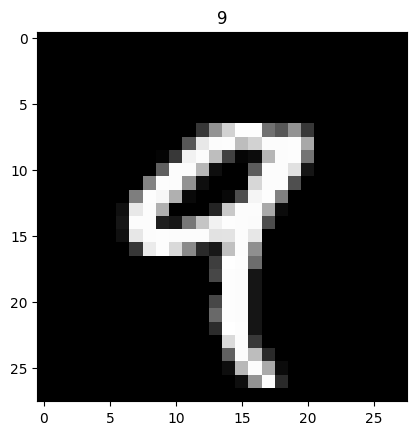

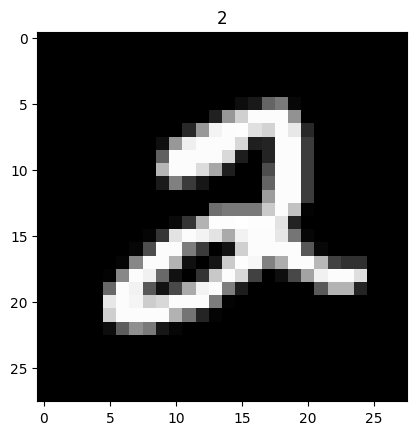

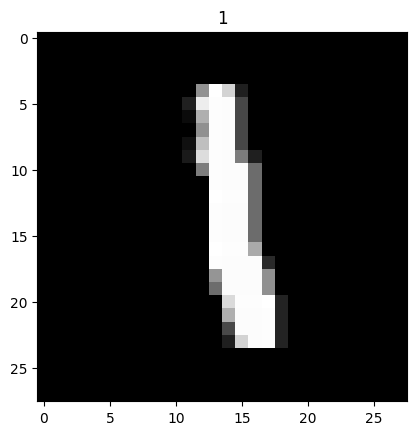

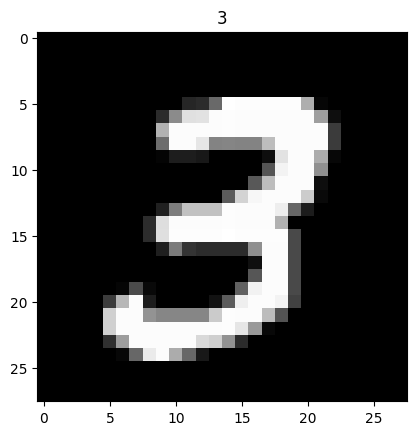

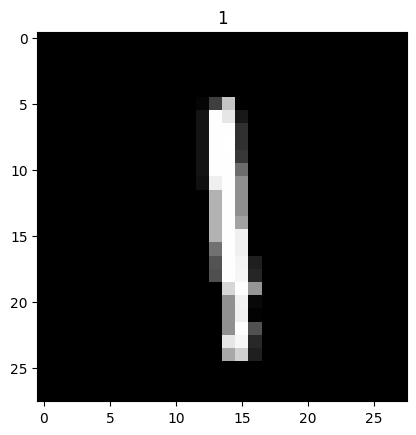

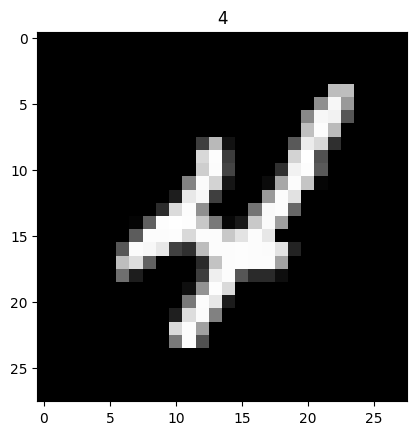

In [ ]:
for i in range(10):
  plt.imshow(np.reshape(X[i,],(28,28)), cmap='gray')
  plt.title(y[i])
  plt.show()

## Exercise 7 - Displaying the neighbors

As part of this exercise, write a knn_visualized function that will have the same signature as knn, but will also render neighboring images. You can assume that it will only be used for MNIST data, so you can turn each vector into a $28 \times 28$ grayscale image.

As a bonus, you can color the pictures of those neighbors whose class was represented the most with a different color.


In [ ]:
def knn_visualized(x, k, x_train, y_train):
  plt.imshow(np.reshape(x,(28,28)), cmap='gray')
  plt.title("Sample")
  plt.show()
  dist = np.sqrt(np.sum((x[np.newaxis, :] - x_train) ** 2, axis=-1))
  idx = np.argpartition(dist, k)[:k]
  cls, counts = np.unique(y_train[idx], return_counts=True)
  for i in idx:
    plt.imshow(np.reshape(x_train[i,],(28,28)), cmap='gray')
    plt.title("Neighbor")
    plt.show()
  return cls[np.argmax(counts)]

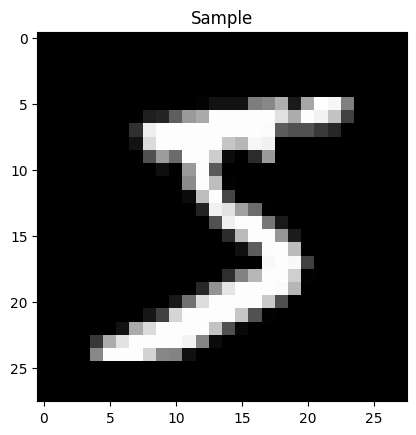

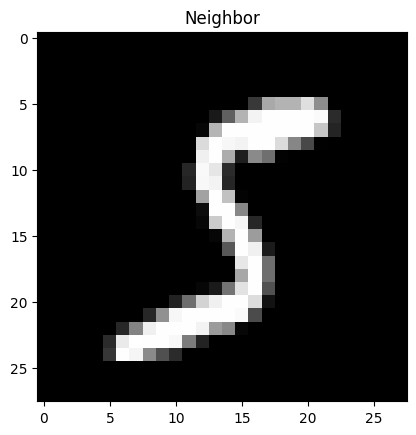

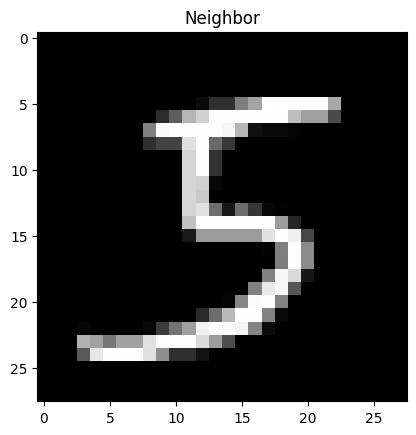

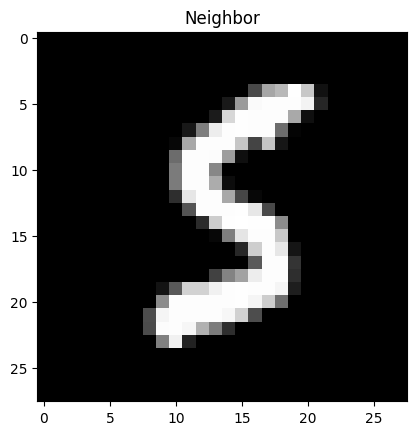

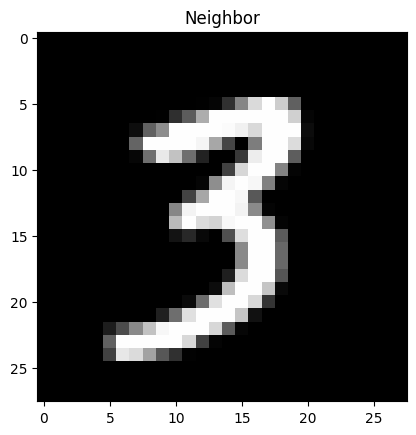

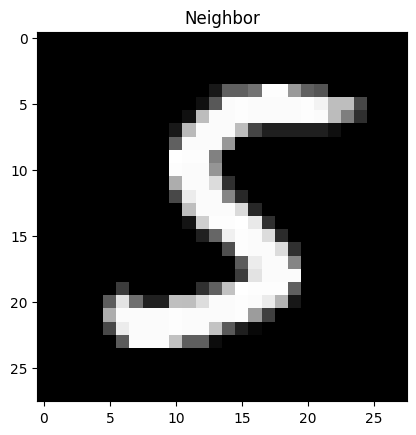

5

In [ ]:
knn_visualized(X[0], 5, X[1:], y[1:])